# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [10]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# Read your api key environment variable

api_key = os.getenv("news_api")

In [19]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

In [17]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

In [56]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.tail()



,date,text,compound,positive,negative,neutral
89,2021-02-10,(Reuters) - Shares of companies that have inve...,0.7579,0.190,0.0,0.810
90,2021-02-10,LONDON (Reuters) - Tesla boss Elon Musk is a p...,0.0258,0.035,0.0,0.965
91,2021-02-11,"Chief Financial Officer Ned Segal, in speaking...",0.0000,0.000,0.0,1.000
92,2021-02-16,"In case you hadn't heard, Bitcoin is back in t...",0.0258,0.027,0.0,0.973
93,2021-02-16,"Bitcoin (BTC) shot past $50,000 for the first ...",0.5267,0.091,0.0,0.909


In [57]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.tail()



,date,text,compound,positive,negative,neutral
86,2021-02-18,Nvidia announced a new line of GPUs solely for...,0.3612,0.072,0.000,0.928
87,2021-02-04,"* World shares drop after 3-day gains, retail ...",-0.2263,0.124,0.175,0.701
88,2021-02-07,Non-fungible tokens (NFTs) are gaining popular...,0.9001,0.333,0.000,0.667
89,2021-02-09,By Reuters Staff\r\nWASHINGTON (Reuters) - Sev...,0.0000,0.000,0.000,1.000
90,2021-02-08,Posted 2021-02-05\r\nThe term decentralized fi...,0.6808,0.196,0.000,0.804


In [26]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.171465,0.068638,0.026638,0.894074
std,0.385036,0.066486,0.058503,0.125536
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.852500
50%,0.102700,0.066500,0.000000,0.923000
75%,0.466650,0.102500,0.000000,0.961000
max,0.851900,0.260000,0.326000,1.000000


In [27]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,91.000000,91.000000,91.00000,91.000000
mean,0.180749,0.071407,0.02767,0.900923
std,0.400751,0.078132,0.04883,0.083729
min,-0.709600,0.000000,0.00000,0.667000
25%,0.000000,0.000000,0.00000,0.852000
50%,0.102700,0.063000,0.00000,0.909000
75%,0.526700,0.115500,0.06000,1.000000
max,0.900100,0.333000,0.17500,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [28]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [29]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))



In [30]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    re_words = word_tokenize(re_clean)
    
    
    # Lemmatize words into root words
    re_words_lemitized = [lemmatizer.lemmatize(word) for word in re_words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in re_words_lemitized if word.lower() not in sw]
    
    
    
    return tokens

In [66]:
big_string_btc = ' '.join(btc_df.text)
#big_string_btc

In [69]:
# Create a new tokens column for Bitcoin
btc_tokens = pd.DataFrame()
big_string_btc = ' '.join(btc_df.text)
btc_tokens['tokens'] = tokenizer(big_string_btc)

In [71]:
# Create a new tokens column for Ethereum
eth_tokens = pd.DataFrame()
big_string_eth = ' '.join(eth_df.text)
eth_tokens['tokens'] = tokenizer(big_string_eth)

In [77]:
btc_tokens.tokens

0                 elon
1                musks
2       cryptocurrency
3                 hype
4                   wa
             ...      
1875             began
1876            discus
1877              come
1878              next
1879              char
Name: tokens, Length: 1880, dtype: object

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [72]:
from collections import Counter
from nltk import ngrams

In [81]:
# Generate the Bitcoin N-grams where N=2
bigram_counts_btc = Counter(ngrams(btc_tokens.tokens, n=2))


In [82]:
# Generate the Ethereum N-grams where N=2
bigram_counts_eth = Counter(ngrams(eth_tokens.tokens, n=2))


In [84]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [88]:
# Use token_count to get the top 10 words for Bitcoin

top_ten_btc = token_count(btc_tokens.tokens, N=10)

#Without using token_count -- thought of this first
btc_word_counts = Counter(btc_tokens.tokens)
top_10_btc = btc_word_counts.most_common(10)



top_ten_btc

[('char', 91),
 ('bitcoin', 71),
 ('reuters', 44),
 ('ha', 25),
 ('cryptocurrency', 18),
 ('tesla', 18),
 ('high', 16),
 ('photo', 15),
 ('currency', 15),
 ('market', 14)]

In [89]:
# Use token_count to get the top 10 words for Ethereum
top_ten_eth = token_count(eth_tokens.tokens, N=10)
top_ten_eth

[('char', 91),
 ('reuters', 47),
 ('bitcoin', 38),
 ('new', 25),
 ('cryptocurrency', 23),
 ('high', 23),
 ('ethereum', 22),
 ('dollar', 19),
 ('record', 15),
 ('us', 15)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [90]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

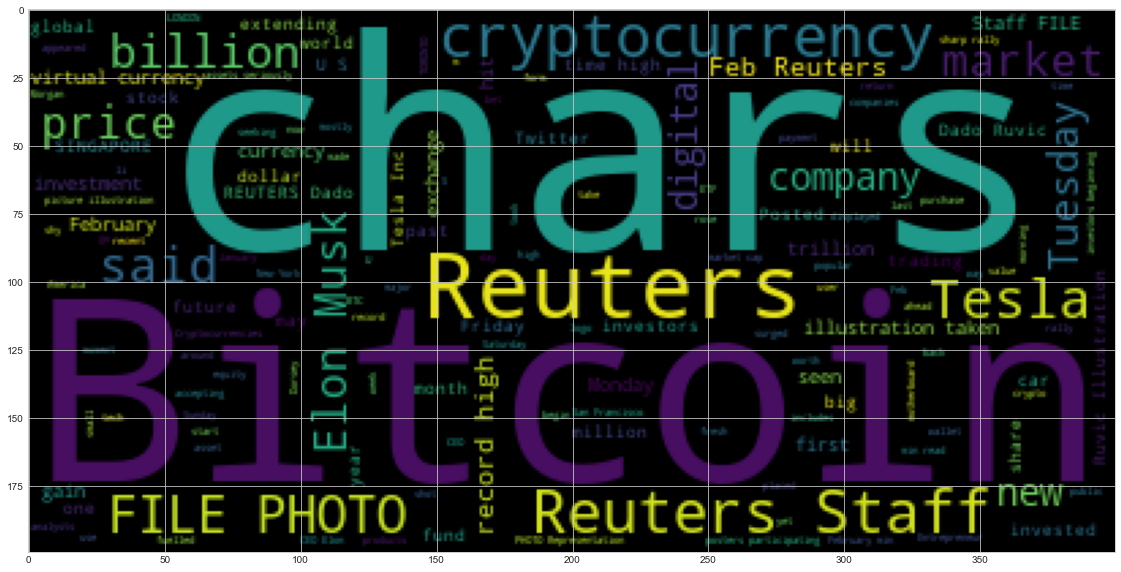

In [96]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(big_string_btc)
plt.imshow(btc_wc)

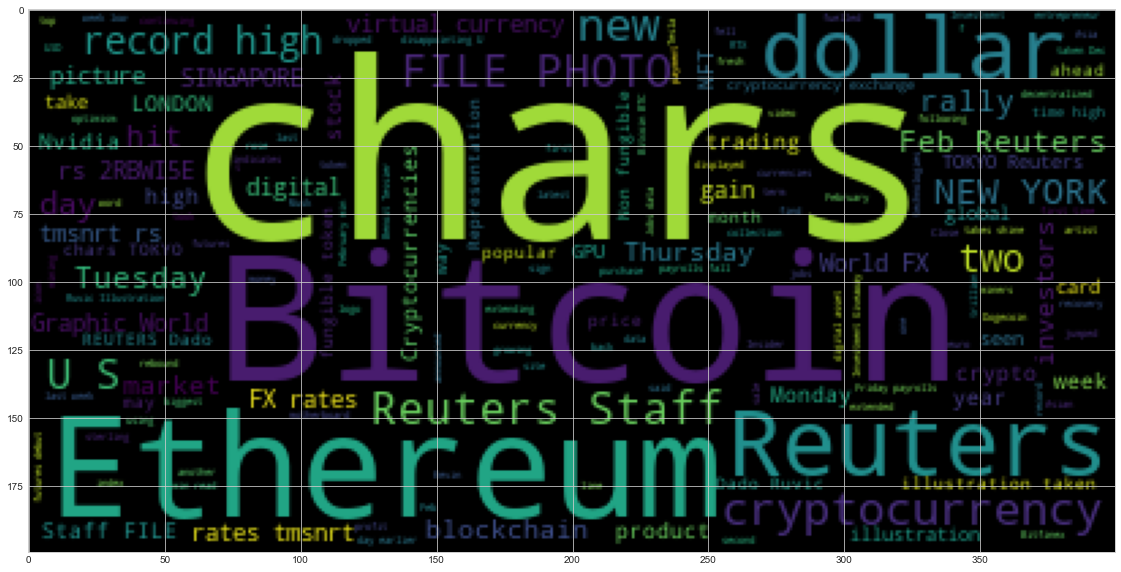

In [97]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(big_string_eth)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [98]:
import spacy
from spacy import displacy

In [100]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-03-04 23:45:34.211660: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-04 23:45:34.211717: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [101]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [105]:
# Concatenate all of the Bitcoin text together
btc_raw_text = big_string_btc

In [114]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_raw_text)


In [107]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [108]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Tesla', '$1.5 billion', 'Elon Musk', 'about $ 1.5 billion', 'January', 'Artur', 'Widak', 'NurPhoto', 'Sunday', 'Tesla', '$1.5 billion', 'Jack Dorsey', 'Jay Z', 'Africa', 'India', 'Dorsey', 'Friday', '500', 'Today', 'SEC', 'Tesla', '$1.5 billion', 'first', 'more than a decade later', 'Feb. 9, 2021', '8:01 a.m.', 'Feb. 9, 2021', '8:01 a.m.', 'Bitcoin', 'Teslas', 'Monday', '1.5', 'Coinbase', 'San Francisco', 'last year', 'Thursday', 'this morning', 'over $50,000', 'Jack Dorsey', 'Jay Z', 'Datadog', 'Startup Battlefield', 'BuzzFeed', 'AI', 'Daily Crunch', 'February 12, 2021', 'Francis Suarez', 'Bitcoins', 'recent weeks', 'Friday', 'over $12,000', 'New York', 'CNN', 'above $58,000', 'Sunday', 'just above $46,000', 'Tuesday', '6', 'Alabamas', 'Richard Shelby', 'next year', 'Shelby', '86', 'seventh', 'Blockchain.com', '$120 million', 'Moore Strategic Ventu', 'DoorDash', 'Tesla', 'Daily Crunch', 'February 8, 2021', 'DoorDash', 'This morning', 'Coinbase', 'American', 'Reuters', 'FILE', 'Bitco

---

### Ethereum NER

In [109]:
# Concatenate all of the Ethereum text together
eth_raw_text = big_string_eth

In [112]:
# Run the NER processor on all of the text
eth_doc = nlp(btc_raw_text)

In [113]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [115]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['Tesla', '$1.5 billion', 'Elon Musk', 'about $ 1.5 billion', 'January', 'Artur', 'Widak', 'NurPhoto', 'Sunday', 'Tesla', '$1.5 billion', 'Jack Dorsey', 'Jay Z', 'Africa', 'India', 'Dorsey', 'Friday', '500', 'Today', 'SEC', 'Tesla', '$1.5 billion', 'first', 'more than a decade later', 'Feb. 9, 2021', '8:01 a.m.', 'Feb. 9, 2021', '8:01 a.m.', 'Bitcoin', 'Teslas', 'Monday', '1.5', 'Coinbase', 'San Francisco', 'last year', 'Thursday', 'this morning', 'over $50,000', 'Jack Dorsey', 'Jay Z', 'Datadog', 'Startup Battlefield', 'BuzzFeed', 'AI', 'Daily Crunch', 'February 12, 2021', 'Francis Suarez', 'Bitcoins', 'recent weeks', 'Friday', 'over $12,000', 'New York', 'CNN', 'above $58,000', 'Sunday', 'just above $46,000', 'Tuesday', '6', 'Alabamas', 'Richard Shelby', 'next year', 'Shelby', '86', 'seventh', 'Blockchain.com', '$120 million', 'Moore Strategic Ventu', 'DoorDash', 'Tesla', 'Daily Crunch', 'February 8, 2021', 'DoorDash', 'This morning', 'Coinbase', 'American', 'Reuters', 'FILE', 'Bitco

---